# 3 bit flop task recurrent network
Discrete recurrent neural network solving the 3-bit flop task. In the trained network, 8 stable fixed points are created along with saddle points that separate the basins of attraction of these attractors.

See https://www.mitpressjournals.org/doi/10.1162/NECO_a_00409 for details.
Code below curtesy of Aude Forcione-Lambert (2018)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
%matplotlib notebook

In [2]:
# import data
X = np.loadtxt('Data/x_test_array.gz') # input
Y = np.loadtxt('Data/y_test_array.gz') # target output
Wout = np.loadtxt('Data/wout.gz') # output weights
Win = np.loadtxt('Data/win.gz') # input weigths
W = np.random.normal(size=[100,100]) # random connectivity matrix
# W = np.loadtxt('Data/w.gz') # trained connectivity matrix
N = W.shape[0]

In [3]:
# simulation
num_steps = 150
S = np.ndarray([num_steps,N],dtype=float) # states
S[0,:] = np.random.uniform(size=N) # random initial condition
Out = np.ndarray([num_steps,3],dtype=float)
for t in range(num_steps-1):
    S[t+1,:] = np.tanh(np.dot(S[t,:],W)+np.dot(X[t,:],Win))
    Out[t+1,:] = np.tanh(np.dot(S[t+1,:],Wout))

<IPython.core.display.Javascript object>


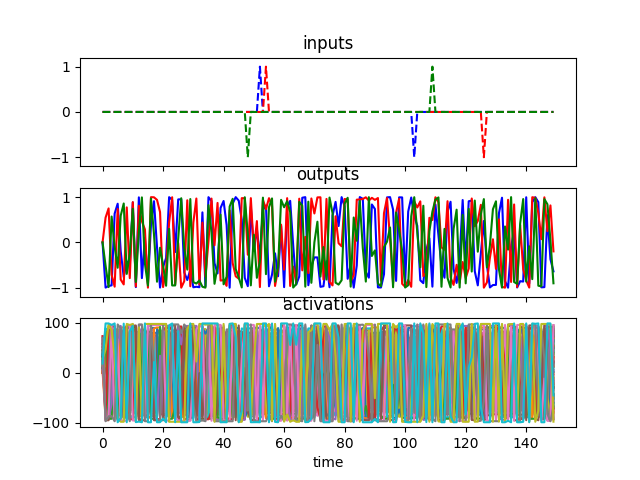

In [7]:
# activity plots
plt.figure()

# inputs
ax1 = plt.subplot(3, 1, 1)
ax1.set_ylim([-1.2,1.2])
plt.plot(X[:num_steps,0],'b--')
plt.plot(X[:num_steps,1],'r--')
plt.plot(X[:num_steps,2],'g--')
plt.title('inputs')
plt.setp(ax1.get_xticklabels(), visible=False)


# outputs
ax2 = plt.subplot(3,1,2,sharex=ax1)
ax2.set_ylim([-1.2,1.2])
plt.plot(Out[:,0],'b')
plt.plot(Out[:,1],'r')
plt.plot(Out[:,2],'g')
plt.title('outputs')
plt.setp(ax2.get_xticklabels(), visible=False)

# activations
ax3 = plt.subplot(3,1,3,sharex=ax1)
for n in range(N):
    plt.plot(n*S[:,n])
plt.title('activations')
plt.xlabel('time')


<IPython.core.display.Javascript object>


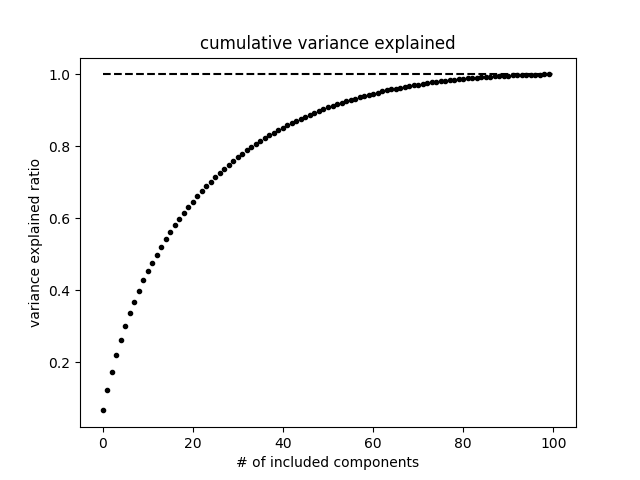

In [9]:
# dimensionality reduction and activity projection

# principal component analysis
pca = PCA(n_components=N)
pca.fit(S)
s = pca.transform(S)

# explained variance plot
plt.figure()
plt.plot(pca.explained_variance_ratio_.cumsum(),'k.')
plt.plot([0,pca.n_components],[1,1],'k--')
plt.xlabel('# of included components')
plt.ylabel('variance explained ratio')
plt.title('cumulative variance explained')

# # activation projections
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot(s[:,0], s[:,1], s[:,2], '-k', linewidth=0.5, alpha=0.5)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# ax.view_init(39,-126)
# plt.tight_layout()